# CHUNK EDA

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Load the dataset
churn_data = pd.read_csv("CustomerChurn.csv")

In [33]:
# first few rows to understand the structure
churn_data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
# Check dataset dimensions
print(f"Dataset contains {churn_data.shape[0]} rows and {churn_data.shape[1]} columns.")

Dataset contains 7043 rows and 21 columns.


In [39]:
# List column names to understand available data
print("Column Names:")
print(churn_data.columns.values)

Column Names:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [43]:
# Check for missing values
print("Missing Values Summary:")
print(churn_data.isnull().sum())

Missing Values Summary:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [45]:
# Data types of each column
print("Column Data Types:")
print(churn_data.dtypes)

Column Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [54]:
print(churn_data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


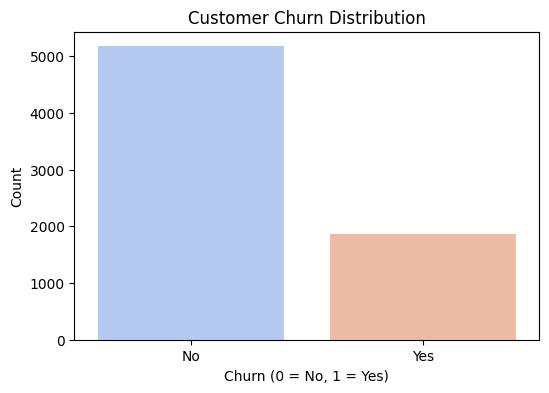

In [56]:
# Visualizing Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=churn_data, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

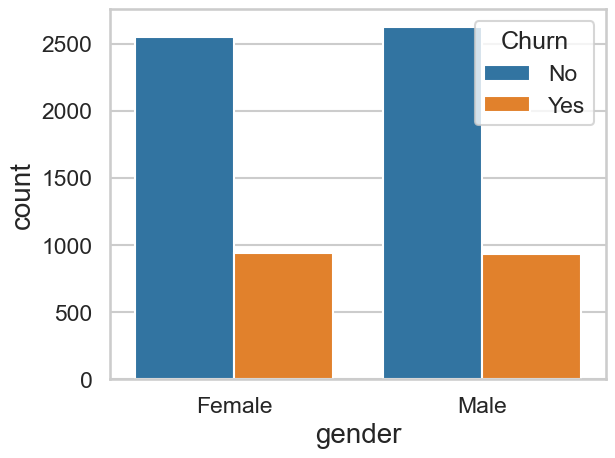

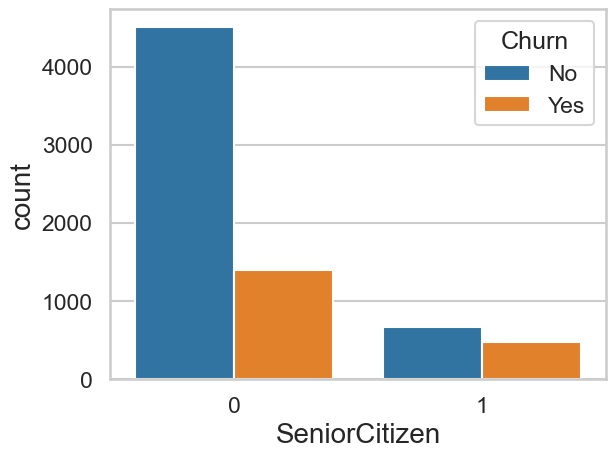

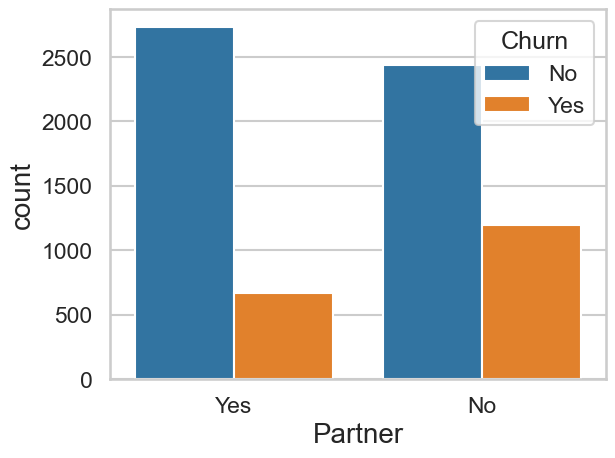

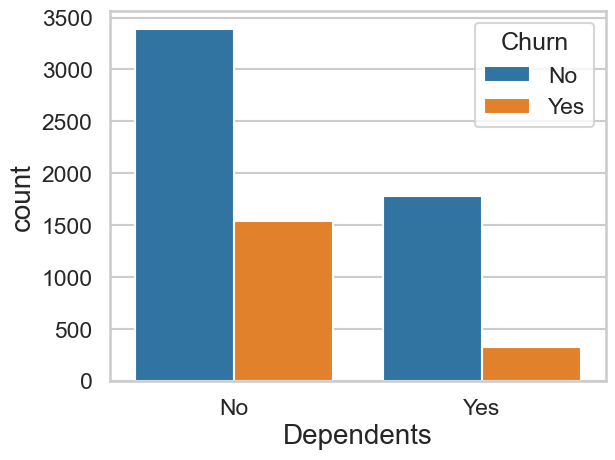

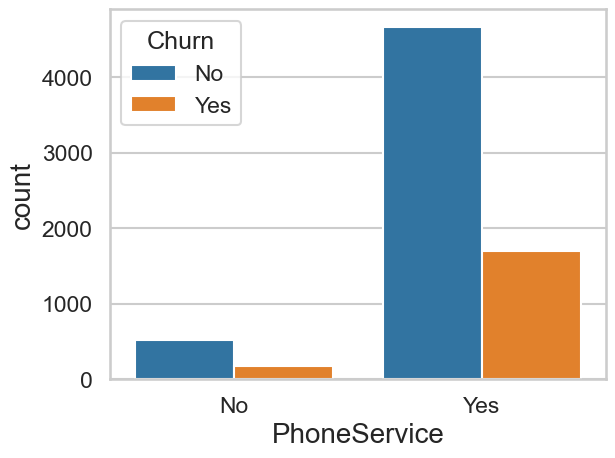

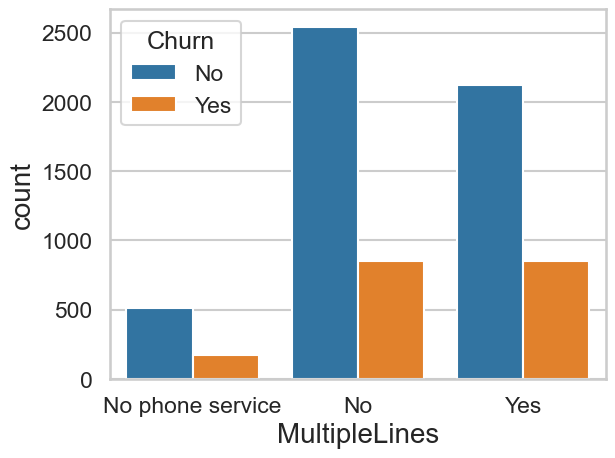

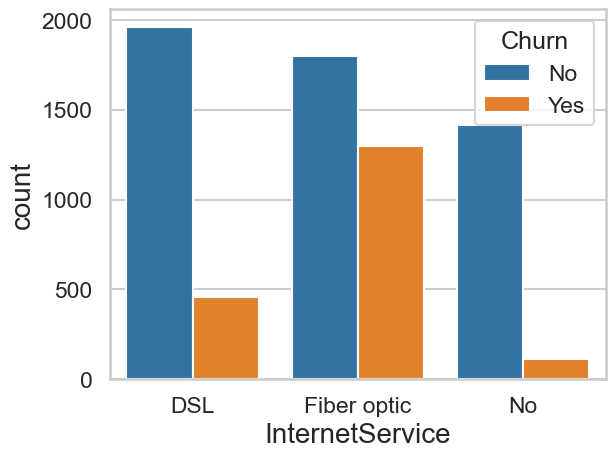

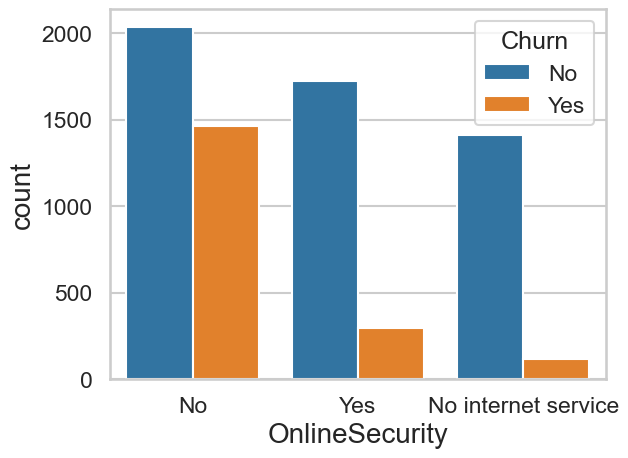

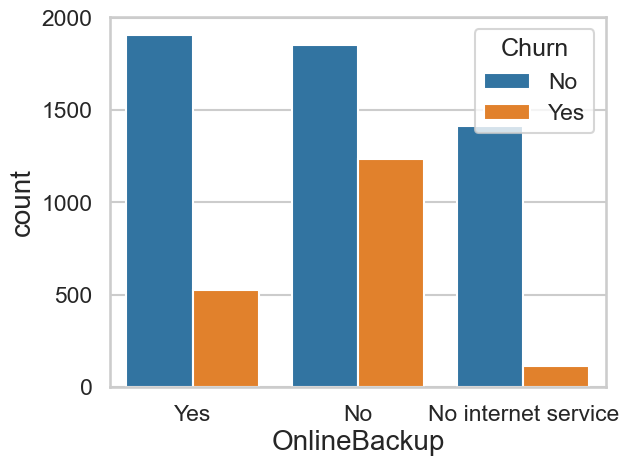

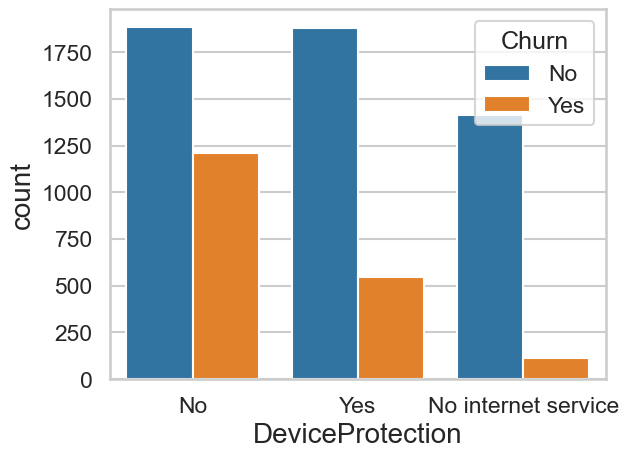

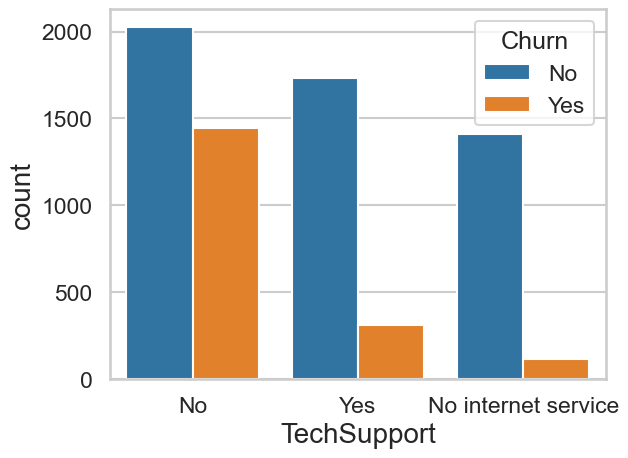

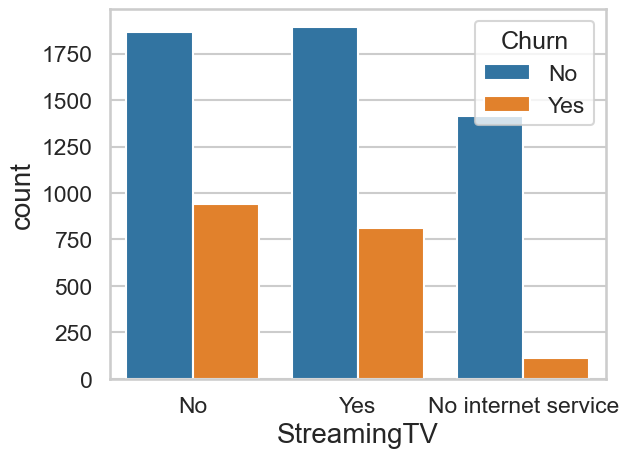

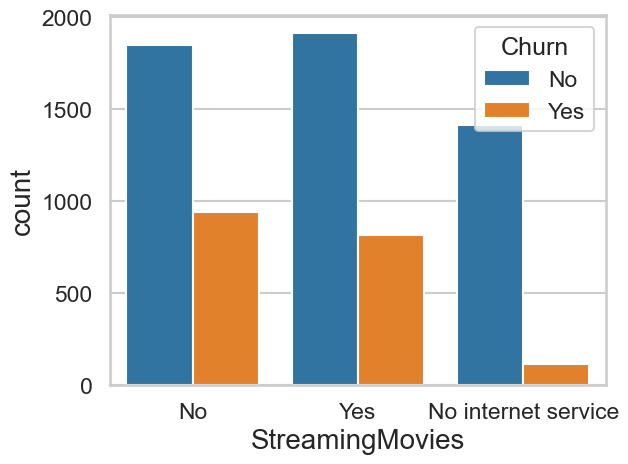

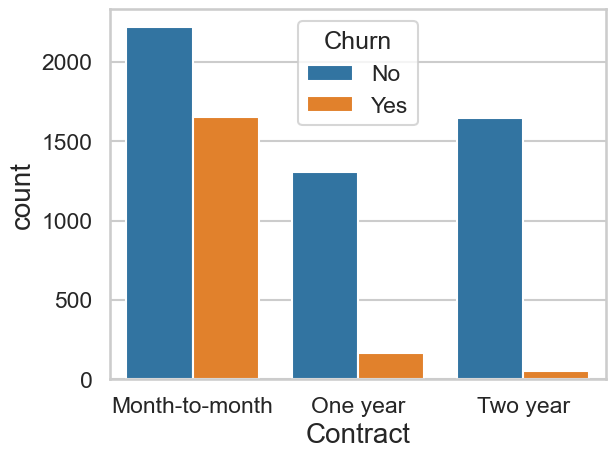

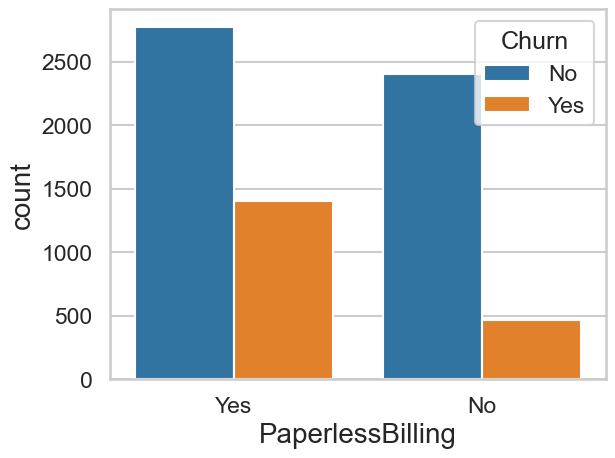

In [95]:
for i, predictor in enumerate(churn_data.drop(columns=['customerID','Churn', 'TotalCharges', 'MonthlyCharges','tenure','PaymentMethod'])):
    plt.figure(i)
    sns.countplot(data=churn_data, x=predictor, hue='Churn')

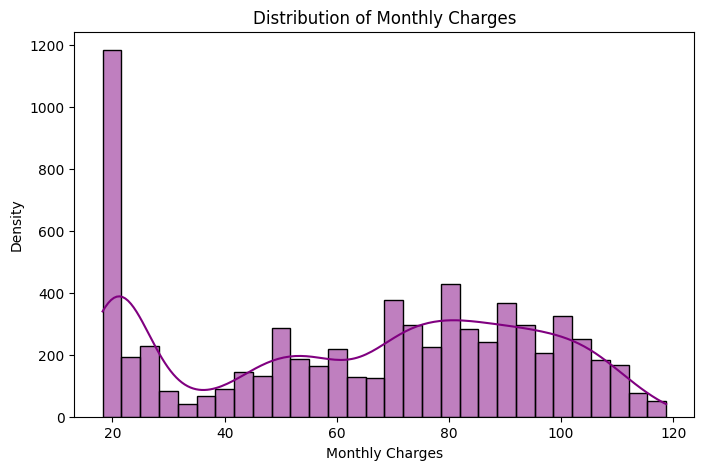

In [61]:
# Distribution of MonthlyCharges
plt.figure(figsize=(8,5))
sns.histplot(churn_data['MonthlyCharges'], bins=30, kde=True, color='purple')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()


# Conclusion: Monthly charges vary widely, which may impact churn behavior.
# - Insight: Customers with very high monthly charges might be at higher risk of churning due to cost sensitivity.

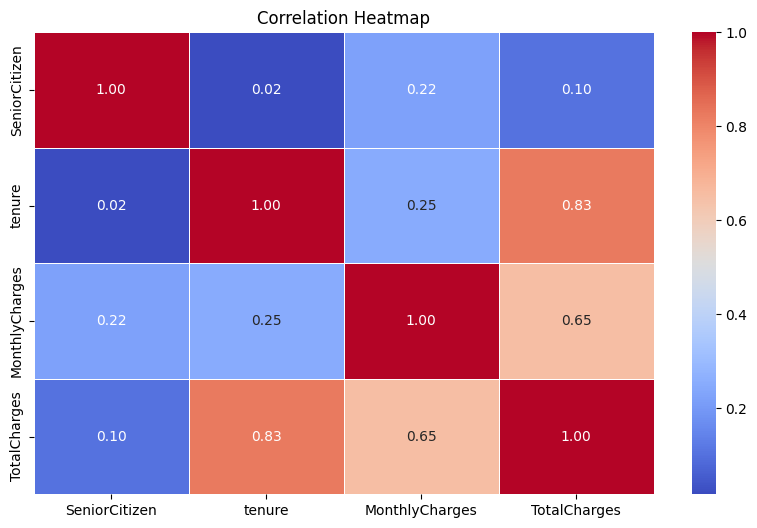

In [66]:
# Select only numeric columns
numeric_data = churn_data.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Conclusion: Tenure and TotalCharges have a strong positive correlation, which makes sense as longer tenure means higher total charges.
# - Actionable Insight: Retention strategies should focus on increasing tenure to reduce churn.

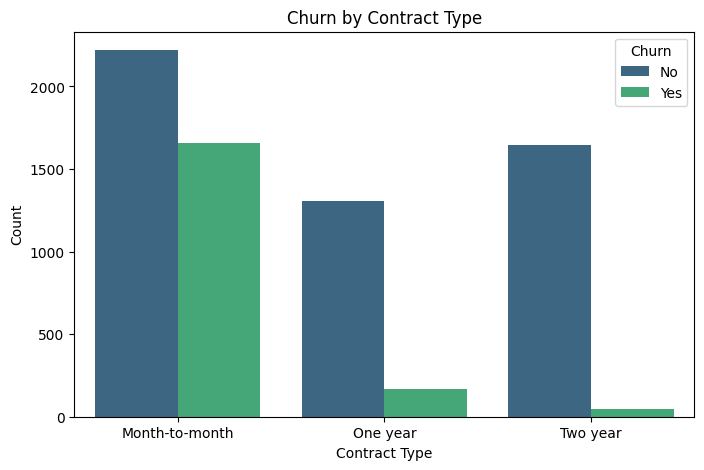

In [70]:
# Churn by Contract Type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=churn_data, palette='viridis')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


# Conclusion: Customers on month-to-month contracts are more likely to churn compared to those with yearly contracts.
# - Business Recommendation: Encourage long-term contracts through discounts or loyalty programs.


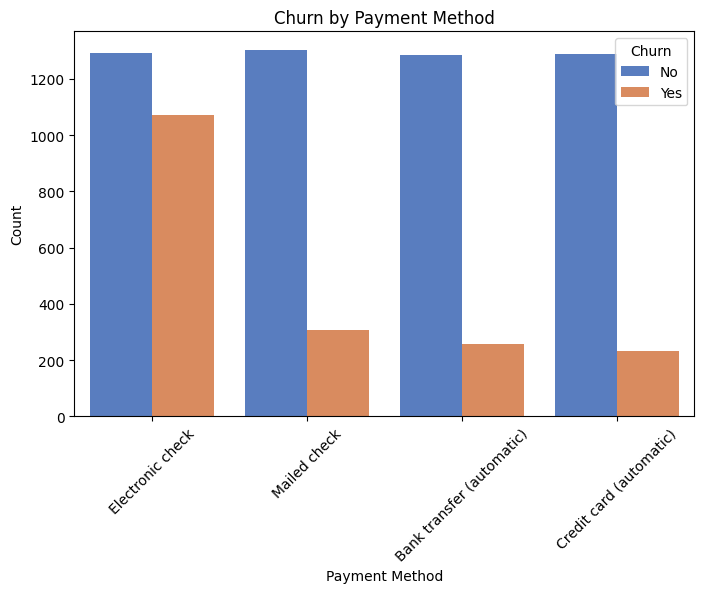

In [73]:
# Churn by Payment Method
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=churn_data, palette='muted')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


                                                     # Thankn you